<h1>What Is Data Visualization?</h1>
<hr>
<h3>“The representation of information in the form of a chart, diagram, picture, etc.”</h3>

<h6>
Use a simple bar chart showing the number of accidents per year (2019–2022) to illustrate how raw numbers become instantly understandable when visualized.
</h6>

In [1]:
import pandas as pd
df = pd.read_csv('datasets\\uk_accident_data.csv')

In [2]:
# Step 1: Convert to string only if not null
df['Accident Date'] = df['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')

df.dtypes
df.isnull().sum()

df['Year'] = df['Accident Date'].dt.year
df['Month'] =  df['Accident Date'].dt.month
df['Day'] =  df['Accident Date'].dt.day
df['DayOfWeek'] =  df['Accident Date'].dt.dayofweek
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

<Axes: xlabel='Year'>

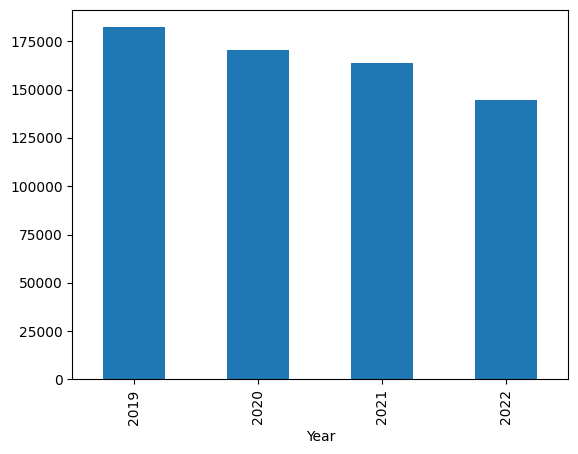

In [7]:
# Example: Bar chart of accident counts per year
import matplotlib.pyplot as plt
df.groupby('Year')['Index'].size().plot(kind='bar')

<h1>Why Is It Important?</h1>
<ul>
    <li><h4>Helps identify patterns, trends, and outliers.</h4> </li>
    <li><h4>Speeds up decision-making.</h4></li>
    <li><h4>Makes data accessible to non-technical stakeholders.</h4></li>
</ul>

<h4>
📊 Example Visualization: Line chart showing monthly accident trends over time. This reveals seasonal spikes (e.g., winter months, holidays).
</h4>

<h1>Types of Visualizations (with Dataset Examples)</h1>
<table>
    <tr>
        <th>
            Visualization Type
        </th>
        <th>
            UK Dataset Example
        </th>
        <th>
            Purpose
        </th>
    </tr>
    <tr>
        <td>
            Histogram
        </td>
        <td>
            Distribution of accident severity
        </td>
        <td>
            Show frequency of severity levels
        </td>
    </tr>
    <tr>
        <td>
            Heatmap
        </td>
        <td>
            Accidents by region vs. time of day
        </td>
        <td>
            Reveal hotspots and peak hours
        </td>
    </tr>
    <tr>
        <td>
            Box Plot
        </td>
        <td>
            Casualty age distribution
        </td>
        <td>
            Spot outliers and age concentration
        </td>
    </tr>
    <tr>
        <td>
            Pie Chart
        </td>
        <td>
            Proportion of accident causes
        </td>
        <td>
            Show relative contribution
        </td>
    </tr>
    <tr>
        <td>
            Stacked Bar Chart
        </td>
        <td>
            Road type vs. lighting condition
        </td>
        <td>
            Compare accident counts across categories
        </td>
    </tr>
</table>

<h1>Univariate Plotting </h1>
<h2>Focus on one variable at a time.</h2>

<h4>📌 Example: Histogram of vehicle types involved </h4>


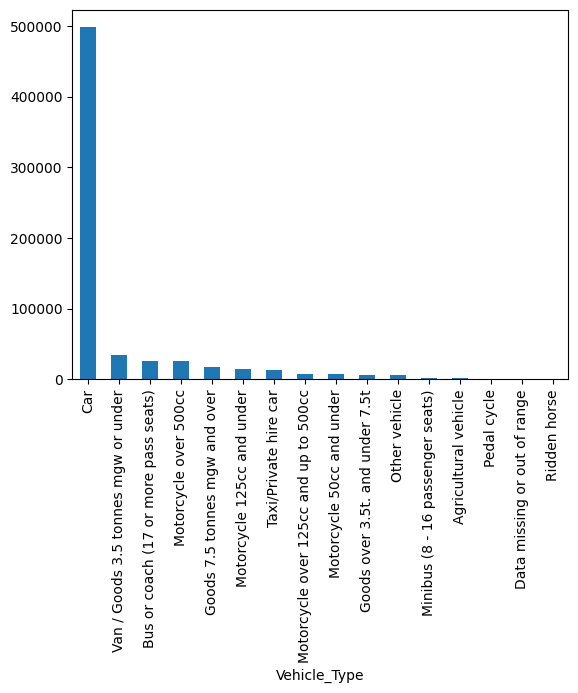

In [8]:

df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

In [10]:
nocar_df = df[df['Vehicle_Type'] != 'Car']

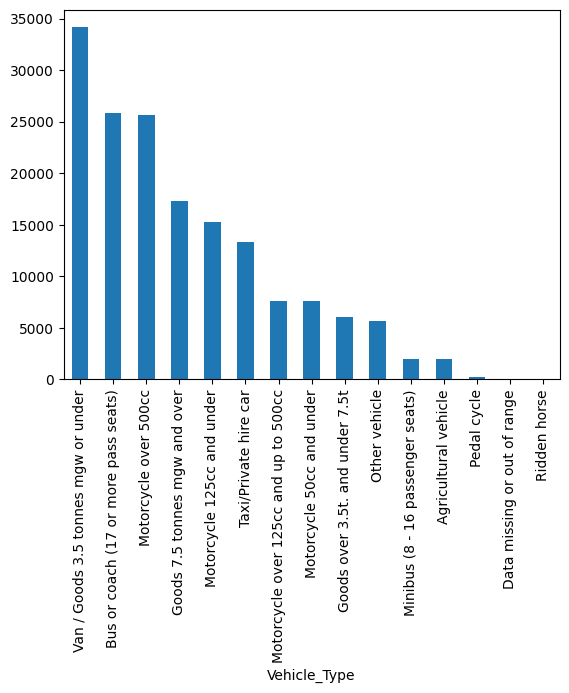

In [11]:
nocar_df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
vehicle_group = nocar_df.groupby(['Vehicle_Type']).value_counts().plot(kind='bar')

<h1>Advance Groupby Functions</h1>

In [17]:
#df.dtypes
#unstack()
#reset_index()
severity = df.groupby(['Accident_Severity','Year']).size()
severity

Accident_Severity  Year
Fatal              2019      2714
                   2020      2341
                   2021      2057
                   2022      1549
Serious            2019     24322
                   2020     23121
                   2021     21997
                   2022     18777
Slight             2019    155079
                   2020    145129
                   2021    139500
                   2022    124093
dtype: int64

In [26]:
severity2 = df.groupby(['Accident_Severity','Year']).size().unstack(level=0)
severity2

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


In [19]:
severity3 = df.groupby(['Accident_Severity','Year']).size().reset_index()
severity3

,Accident_Severity,Year,0
0,Fatal,2019,2714
1,Fatal,2020,2341
2,Fatal,2021,2057
3,Fatal,2022,1549
4,Serious,2019,24322
5,Serious,2020,23121
6,Serious,2021,21997
7,Serious,2022,18777
8,Slight,2019,155079
9,Slight,2020,145129


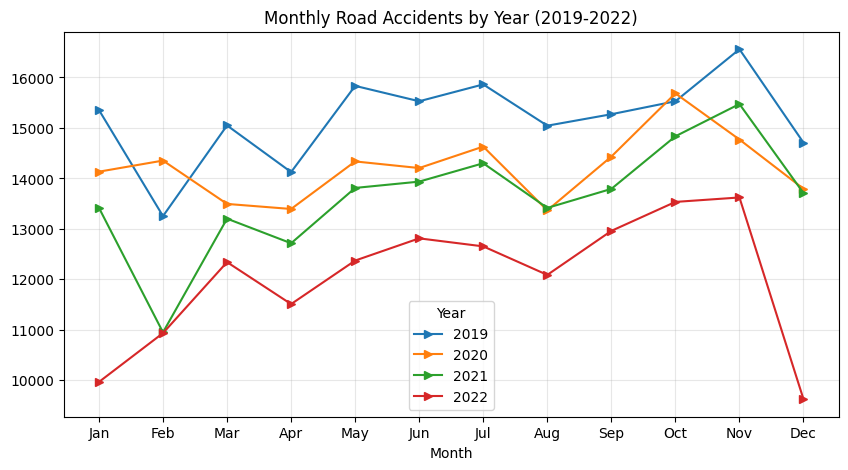

In [27]:
import matplotlib.pyplot as plt

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = df.groupby(['Year', 'Month'])['Index'].count()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
                  marker='o', 
                  figsize=(10, 5),
                  title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

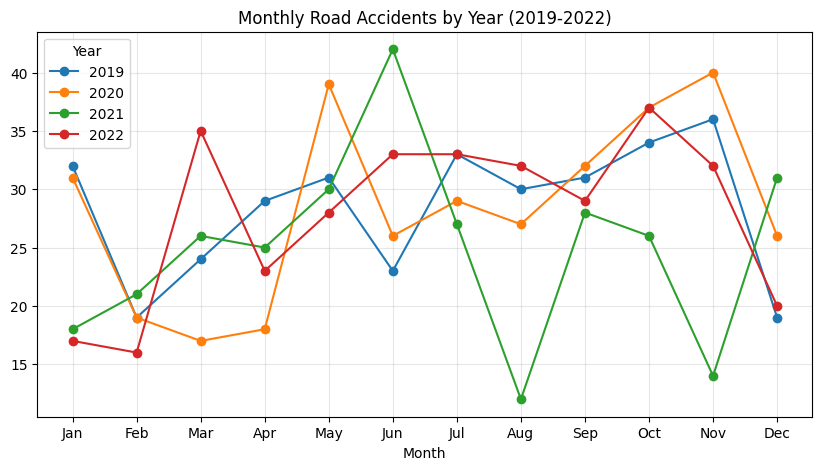

In [39]:
london_df = df[df['District Area'] == 'City of London']

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = london_df.groupby(['Year', 'Month'])['Index'].count()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
                  marker='o', 
                  figsize=(10, 5),
                  title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()


<h1> PIE CHART IN MATPLOTLIB </h1>

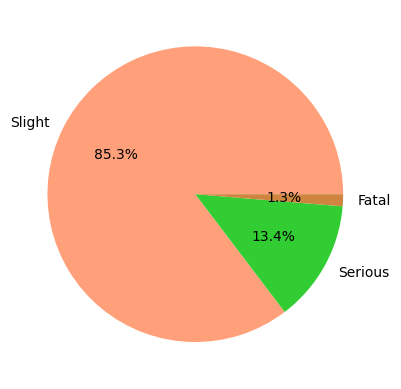

In [72]:
severity_counts = df['Accident_Severity'].value_counts()
severity_counts

plt.pie(severity_counts,
       labels = severity_counts.index,
       autopct = '%1.1f%%',
       colors =['Lightsalmon', 'Limegreen','Peru'])
plt.show()

In [61]:
severity_counts

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [ ]:
monthly_dataxx = df.groupby(['Year', 'Month'])['Index'].count()

# # 2. Unstack Year to create separate lines for each year
monthly_dataxx = monthly_data.unstack(level=0)
monthly_dataxx

monthly_dataxx.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

In [ ]:
monthly_datass = df.groupby(['Year', 'Month'])['Index'].count()
monthly_datass = monthly_data.reset_index()
monthly_datass
# 3. Plot with clean formatting (only 4 lines!)
monthly_datass.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()